<a href="https://colab.research.google.com/github/Rodrigo-Antonio-Silva/DataScienceProject/blob/main/SL_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [ ]:
df = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

In [ ]:
df.head()

,id,sepal_len,sepal_wd,petal_len,petal_wd,species
0,0,5.1,3.5,1.4,0.2,iris-setosa
1,1,4.9,3.0,1.4,0.2,iris-setosa
2,2,4.7,3.2,1.3,0.2,iris-setosa
3,3,4.6,3.1,1.5,0.2,iris-setosa
4,4,5.0,3.6,1.4,0.2,iris-setosa


In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.tail()

,sepal_len,sepal_wd,petal_len,petal_wd,species
145,6.7,3.0,5.2,2.3,iris-virginica
146,6.3,2.5,5.0,1.9,iris-virginica
147,6.5,3.0,5.2,2.0,iris-virginica
148,6.2,3.4,5.4,2.3,iris-virginica
149,5.9,3.0,5.1,1.8,iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wd   150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wd   150 non-null    float64
 4   species    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['species'] = df['species'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sepal_len  150 non-null    float64 
 1   sepal_wd   150 non-null    float64 
 2   petal_len  150 non-null    float64 
 3   petal_wd   150 non-null    float64 
 4   species    150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


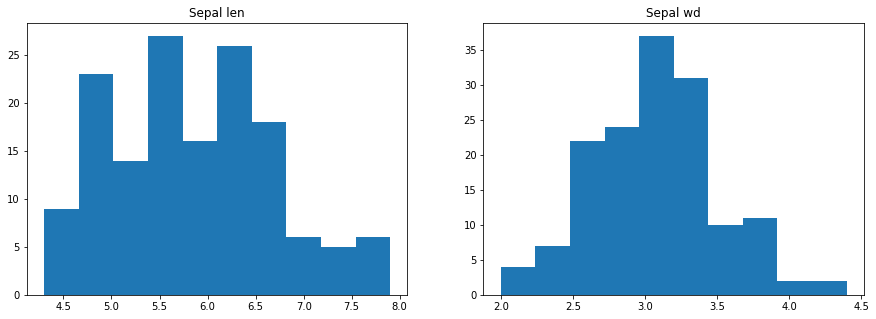

In [ ]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(121)
plt.hist(df['sepal_len'])
plt.title('Sepal len');

ax = fig.add_subplot(122)
plt.hist(df['sepal_wd'])
plt.title('Sepal wd');

Text(0.5, 1.0, 'Petal wd')

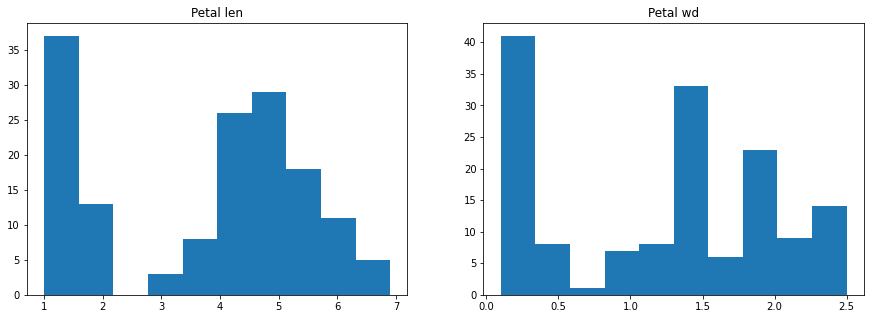

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.hist(df['petal_len'])
plt.title('Petal len');

ax = fig.add_subplot(122)
plt.hist(df['petal_wd'])
plt.title('Petal wd')


Text(0.5, 1.0, 'Box Sepal Wd')

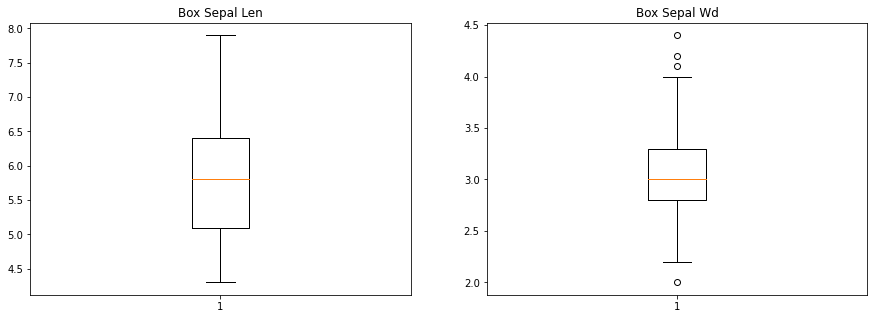

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.boxplot(df['sepal_len'])
plt.title('Box Sepal Len');

ax = fig.add_subplot(122)
plt.boxplot(df['sepal_wd'])
plt.title('Box Sepal Wd')

Text(0.5, 1.0, 'Box Petal Wd')

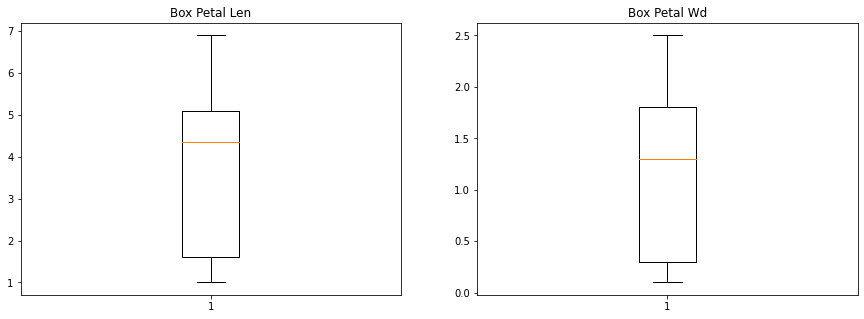

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.boxplot(df['petal_len'])
plt.title('Box Petal Len');

ax = fig.add_subplot(122)
plt.boxplot(df['petal_wd'])
plt.title('Box Petal Wd')

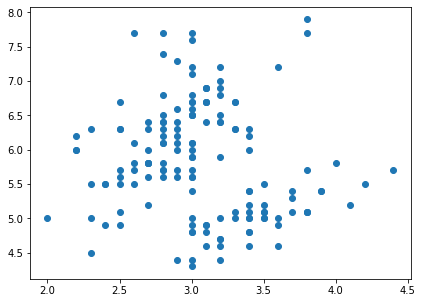

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.scatter(df['sepal_wd'], df['sepal_len'])

In [ ]:
iris_dict = {'iris-setosa': 0, 'iris-versicolor': 1, 'iris-virginica': 2}

In [ ]:
color = [iris_dict[item] for item in df['species']]

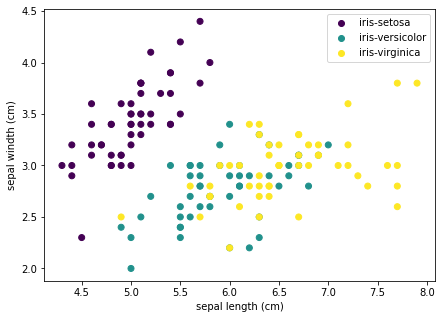

In [ ]:
fig = plt.figure(figsize=(7,5))

scatter = plt.scatter(df['sepal_len'], df['sepal_wd'], c=color)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal windth (cm)')
plt.legend(handles=scatter.legend_elements()[0],
           labels = iris_dict.keys())

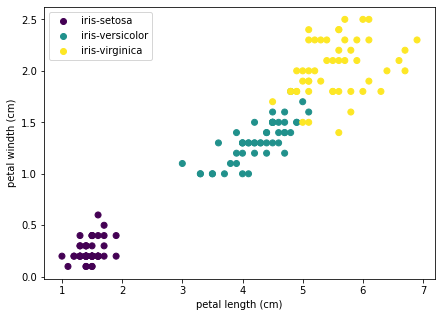

In [ ]:
fig = plt.figure(figsize=(7,5))

scatter = plt.scatter(df['petal_len'], df['petal_wd'], c=color)
plt.xlabel('petal length (cm)')
plt.ylabel('petal windth (cm)')
plt.legend(handles=scatter.legend_elements()[0],
           labels=iris_dict.keys())

In [ ]:
df.corr()

,sepal_len,sepal_wd,petal_len,petal_wd
sepal_len,1.000000,-0.117570,0.871754,0.817941
sepal_wd,-0.117570,1.000000,-0.428440,-0.366126
petal_len,0.871754,-0.428440,1.000000,0.962865
petal_wd,0.817941,-0.366126,0.962865,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f824edfd0>,
      dtype=object)

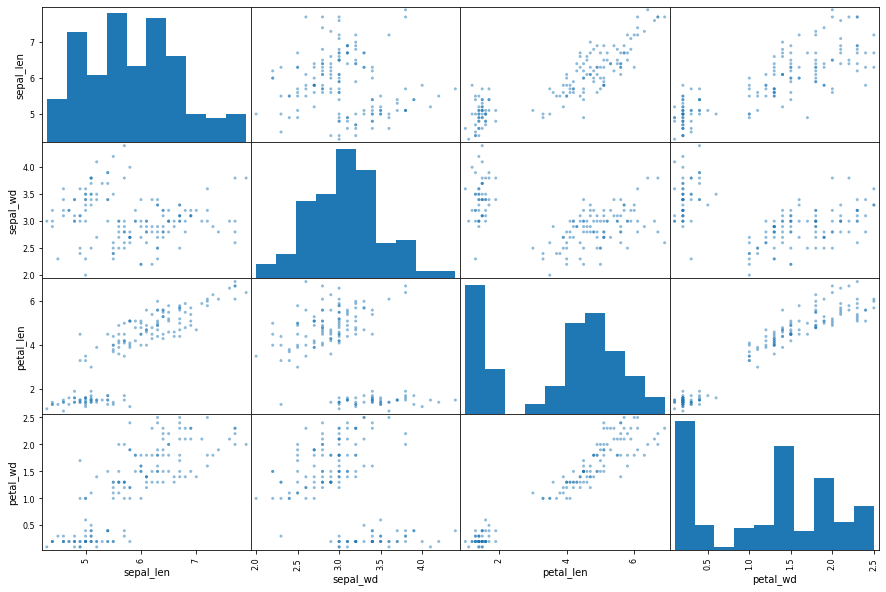

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(15,10), diagonal='hist')


In [ ]:
X = df[['petal_len', 'petal_wd']]
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
  knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test, y_test)

0.9777777777777777

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=['iris-setosa', 'iris-versicolor', 'iris-virginica'])

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

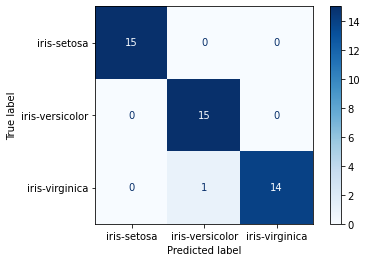

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues);

In [ ]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=5)

In [ ]:
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

In [ ]:
print(cv_scores)

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


In [ ]:
cv_scores.mean()

0.9666666666666668

In [ ]:
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()

In [ ]:
param_grid = {'n_neighbors': np.arange(2, 10)}

In [ ]:
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

In [ ]:
knn_gscv.fit(X, y)

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 4}

In [ ]:
knn_gscv.best_score_

0.9666666666666668

In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])

In [ ]:
knn_final.fit(X, y)

In [ ]:
y_pred1 = knn_final.predict(X)

In [ ]:
knn_final.score(X, y)

0.9733333333333334